In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fedsvrpg = np.array(pd.read_csv('FEDSVRPG_M_rewards_with_value_aggregation.csv').values)
ppo = np.array(pd.read_csv('PPO_rewards_with_value_aggregation.csv').values)
sac = np.array(pd.read_csv('SAC_rewards_with_value_aggregation.csv').values)
td3 = np.array(pd.read_csv('TD3_rewards_with_value_aggregation.csv').values)

fedsvrpg_nc = np.array(pd.read_csv('FEDSVRPG_M_rewards_without_value_aggregation.csv').values)
ppo_nc = np.array(pd.read_csv('PPO_rewards_without_value_aggregation.csv').values)
sac_nc = np.array(pd.read_csv('SAC_rewards_without_value_aggregation.csv').values)
td3_nc = np.array(pd.read_csv('TD3_rewards_without_value_aggregation.csv').values)


In [36]:
total_fedsvrpg = np.concatenate(fedsvrpg)
total_ppo = np.concatenate(ppo)
total_sac = np.concatenate(sac)
total_td3 = np.concatenate(td3)
total_fedsvrpg_nc = np.concatenate(fedsvrpg_nc)[:180]
total_ppo_nc = np.concatenate(ppo_nc)[:180]
total_sac_nc = np.concatenate(sac_nc)[:180]
total_td3_nc = np.concatenate(td3_nc)[:180]
print(len(total_ppo_nc))

180


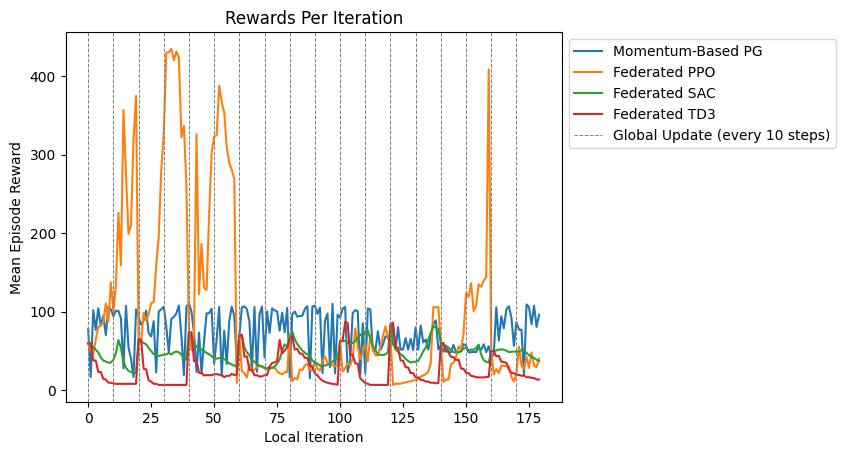

In [37]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
steps = [t for t in range(len(total_ppo))]
plt.plot(steps, total_fedsvrpg, label='Momentum-Based PG', color=colors[0])
plt.plot(steps, total_ppo, label='Federated PPO', color=colors[1])
plt.plot(steps, total_sac, label='Federated SAC', color=colors[2])
plt.plot(steps, total_td3, label='Federated TD3', color=colors[3])
for x in range(0, len(steps), 10):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.7)
# Add a dummy plot for vertical lines to include in the legend
plt.plot([], [], color='gray', linestyle='--', linewidth=0.7, label='Global Update (every 10 steps)')
plt.xlabel("Local Iteration")
plt.ylabel("Mean Episode Reward")
plt.title("Rewards Per Iteration")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

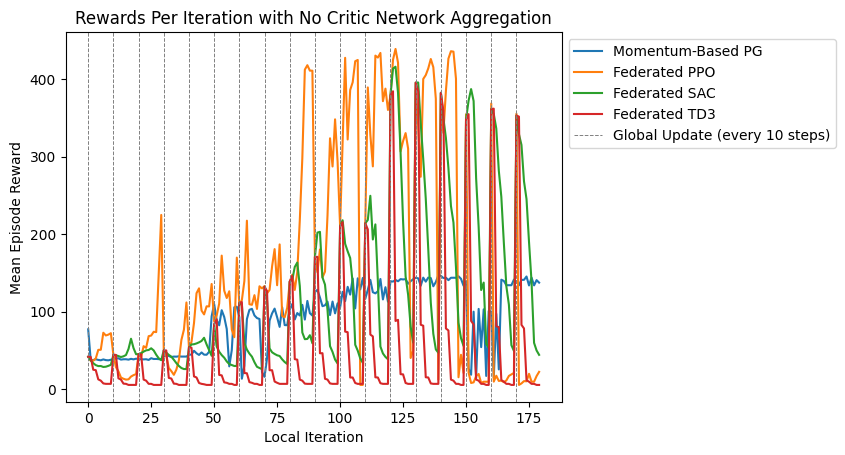

In [42]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
steps = [t for t in range(len(total_ppo_nc))]
plt.plot(steps, total_fedsvrpg_nc, label='Momentum-Based PG', color=colors[0])
plt.plot(steps, total_ppo_nc, label='Federated PPO', color=colors[1])
plt.plot(steps, total_sac_nc, label='Federated SAC', color=colors[2])
plt.plot(steps, total_td3_nc, label='Federated TD3', color=colors[3])
for x in range(0, len(steps), 10):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.7)
# Add a dummy plot for vertical lines to include in the legend
plt.plot([], [], color='gray', linestyle='--', linewidth=0.7, label='Global Update (every 10 steps)')
plt.xlabel("Local Iteration")
plt.ylabel("Mean Episode Reward")
plt.title("Rewards Per Iteration with No Critic Network Aggregation")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [32]:
global_performance = np.mean(np.array([total_fedsvrpg[::10], total_ppo[::10], total_sac[::10], total_td3[::10]]), axis=0)
global_performance_nc = np.mean(np.array([total_fedsvrpg_nc[::10], total_ppo_nc[::10], total_sac_nc[::10], total_td3_nc[::10]]), axis=0)


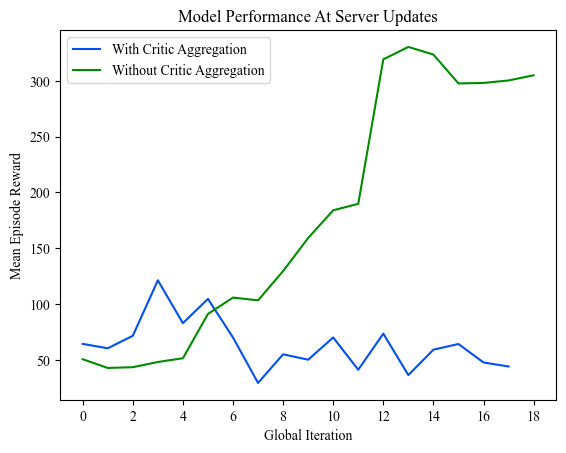

In [72]:
from matplotlib.ticker import MaxNLocator
plt.plot([x for x in range(len(global_performance))], global_performance, label = 'With Critic Aggregation', color='#0050ef')
plt.plot([x for x in range(len(global_performance_nc))], global_performance_nc, label = 'Without Critic Aggregation', color='#008a00')
plt.title('Model Performance At Server Updates')
plt.xlabel("Global Iteration")
plt.ylabel('Mean Episode Reward')
# Set x-axis ticks to every integer
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

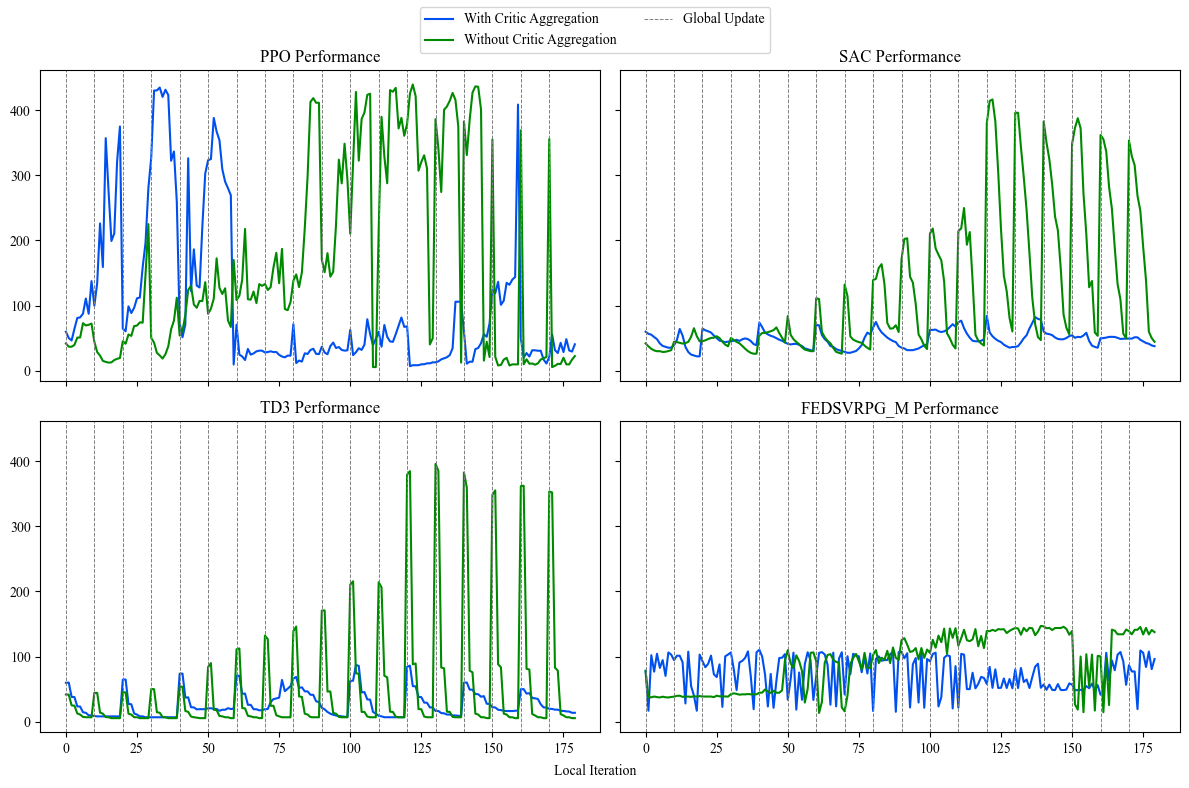

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
# Set font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
# PPO
axs[0, 0].plot(steps, total_ppo, label='With Critic Aggregation', color='#0050ef')
axs[0, 0].plot(steps, total_ppo_nc, label='Without Critic Aggregation', color='#008a00')
for x in range(0, len(steps), 10):
    axs[0, 0].axvline(x=x, color='gray', linestyle='--', linewidth=0.7)
axs[0,0].plot([], [], color='gray', linestyle='--', linewidth=0.7, label='Global Update')
axs[0, 0].set_title('PPO Performance')

# SAC
axs[0, 1].plot(steps, total_sac, label='With Critic Aggregation', color='#0050ef')
axs[0, 1].plot(steps, total_sac_nc, label='Without Critic Aggregation', color='#008a00')
for x in range(0, len(steps), 10):
    axs[0, 1].axvline(x=x, color='gray', linestyle='--', linewidth=0.7)
axs[0, 1].set_title('SAC Performance')

# TD3
axs[1, 0].plot(steps, total_td3, label='With Critic Aggregation', color='#0050ef')
axs[1, 0].plot(steps, total_td3_nc, label='Without Critic Aggregation', color='#008a00')
for x in range(0, len(steps), 10):
    axs[1, 0].axvline(x=x, color='gray', linestyle='--', linewidth=0.7)
axs[1, 0].set_title('TD3 Performance')

# FEDSVRPG_M
axs[1, 1].plot(steps, total_fedsvrpg, label='With Critic Aggregation', color='#0050ef')
axs[1, 1].plot(steps, total_fedsvrpg_nc, label='Without Critic Aggregation', color='#008a00')
for x in range(0, len(steps), 10):
    axs[1, 1].axvline(x=x, color='gray', linestyle='--', linewidth=0.7)
axs[1, 1].set_title('FEDSVRPG_M Performance')

# Add common x and y labels
fig.text(0.5, 0.04, 'Local Iteration', ha='center', va='center')


# Add a single legend for the whole figure
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.subplots_adjust(left=.15, right=0.95, top=0.95, bottom=0.08)
# Adjust y-label position to avoid overlapping
for ax in axs[:, 0]:
    ax.yaxis.set_label_coords(-0.15, 0.5)

plt.tight_layout(rect=[0, 0.04, 1, 0.96])

